<a href="https://colab.research.google.com/github/FabioMMaia/Anomalies_Categorics/blob/main/Market_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

# Ignorar o aviso de depreciação relacionado ao IPython
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Exemplo de transações de compras
transactions = [
    ['Leite', 'Pão', 'Ovos'],
    ['Leite', 'Pão', 'Maçãs'],
    ['Pão', 'Bananas'],
    ['Leite', 'Pão', 'Ovos'],
    ['Ovos', 'Bananas']
]

# Instanciação do TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Criação do DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicação do algoritmo Apriori para encontrar itens frequentes
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Cálculo das regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Maçãs),(Leite),0.2,0.6,0.2,1.00,1.666667,0.08,inf,0.500000
1,(Leite),(Pão),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.500000
2,(Pão),(Leite),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.000000
3,(Maçãs),(Pão),0.2,0.8,0.2,1.00,1.250000,0.04,inf,0.250000
4,"(Leite, Maçãs)",(Pão),0.2,0.8,0.2,1.00,1.250000,0.04,inf,0.250000
5,"(Pão, Maçãs)",(Leite),0.2,0.6,0.2,1.00,1.666667,0.08,inf,0.500000
6,(Maçãs),"(Leite, Pão)",0.2,0.6,0.2,1.00,1.666667,0.08,inf,0.500000
7,"(Ovos, Pão)",(Leite),0.4,0.6,0.4,1.00,1.666667,0.16,inf,0.666667
8,"(Leite, Ovos)",(Pão),0.4,0.8,0.4,1.00,1.250000,0.08,inf,0.333333


In [4]:
transactions = pd.read_csv('/content/drive/MyDrive/Projeto ML/2024/Anomalies em Categoricas/store_data.csv',header=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
transactions.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 20)

In [6]:
transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
list_values = []
for i,row in transactions.iterrows():

  list_values.append(list(row.dropna()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
len(list_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7501

In [9]:
# list_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Instanciação do TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(list_values).transform(list_values)
df_ohe = pd.DataFrame(te_ary, columns = te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
df_ohe.iloc[:5,:8]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce
0,False,True,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False


In [12]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.4,(Bananas)
1,0.6,(Leite)
2,0.2,(Maçãs)
3,0.6,(Ovos)
4,0.8,(Pão)
5,0.2,"(Bananas, Ovos)"
6,0.2,"(Bananas, Pão)"
7,0.2,"(Leite, Maçãs)"
8,0.4,"(Leite, Ovos)"
9,0.6,"(Leite, Pão)"


In [13]:
# Aplicação do algoritmo Apriori para encontrar itens frequentes
frequent_itemsets = apriori(df_ohe, min_support=1e-3, max_len=4, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.008932,(antioxydant juice)
2,0.004666,(asparagus)
3,0.033329,(avocado)
4,0.004533,(babies food)
...,...,...
6716,0.001466,"(soup, spaghetti, mineral water, turkey)"
6717,0.001600,"(tomatoes, spaghetti, turkey, mineral water)"
6718,0.001466,"(tomatoes, spaghetti, whole wheat rice, minera..."
6719,0.001067,"(spaghetti, whole wheat rice, mineral water, t..."


In [15]:
# dir(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# Cálculo das regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1e-5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
import numpy as np
rules['lift_log'] = rules['lift'].apply(np.log)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

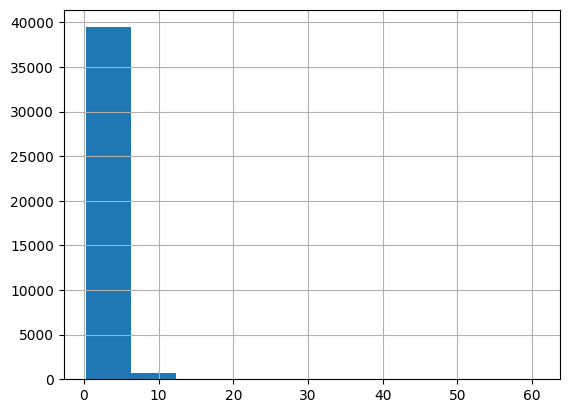

In [59]:
rules['lift'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

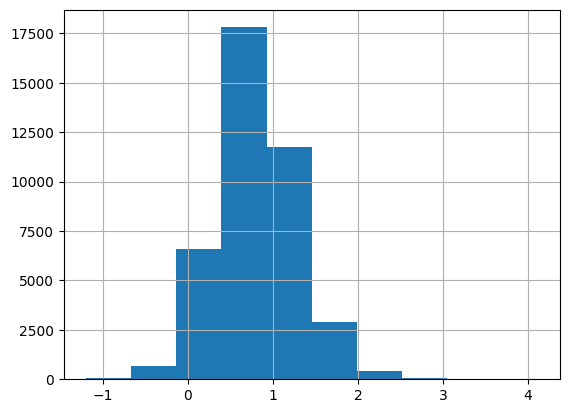

In [60]:
rules['lift_log'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='zhangs_metric', ylabel='lift'>

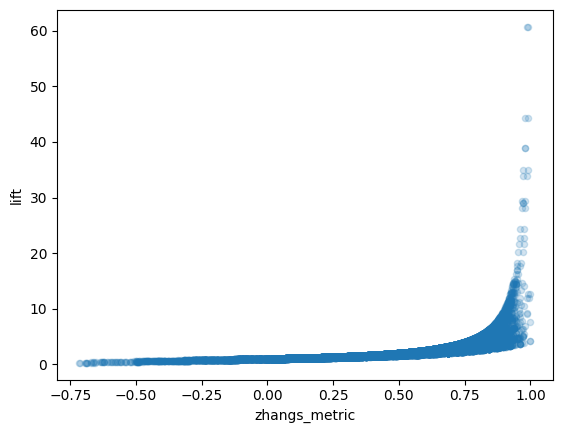

In [61]:
rules.plot(x='zhangs_metric', y= 'lift', kind='scatter',alpha=.2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='lift'>

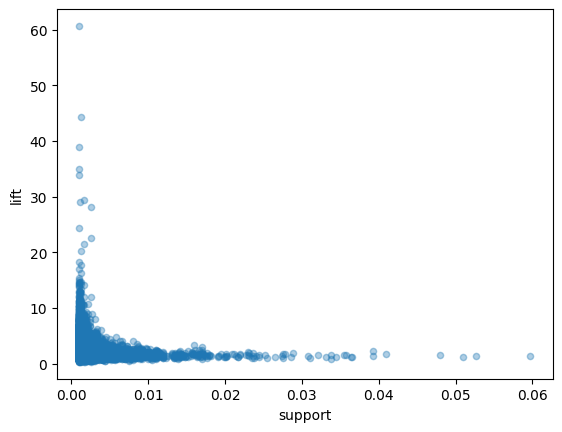

In [62]:
rules.plot(x='support', y= 'lift', kind='scatter', alpha=.2)

In [63]:
rules.sort_values(by='lift_log')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lift_log
1543,(olive oil),(cookies),0.065858,0.080389,0.001600,0.024291,0.302173,-0.003694,0.942506,-0.711996,-1.196754
1542,(cookies),(olive oil),0.080389,0.065858,0.001600,0.019900,0.302173,-0.003694,0.953109,-0.715200,-1.196754
13475,(cookies),"(mineral water, ground beef)",0.080389,0.040928,0.001067,0.013267,0.324156,-0.002224,0.971967,-0.693927,-1.126532
13474,"(mineral water, ground beef)",(cookies),0.040928,0.080389,0.001067,0.026059,0.324156,-0.002224,0.944216,-0.684931,-1.126532
1512,(cookies),(frozen vegetables),0.080389,0.095321,0.002533,0.031509,0.330559,-0.005130,0.934112,-0.687716,-1.106969
...,...,...,...,...,...,...,...,...,...,...,...
35391,"(french fries, mushroom cream sauce)","(pasta, escalope)",0.004666,0.005866,0.001067,0.228571,38.966234,0.001039,1.288692,0.978904,3.662695
35236,"(pasta, mineral water)","(eggs, shrimp)",0.002133,0.014131,0.001333,0.625000,44.227594,0.001303,2.628983,0.979479,3.789349
35233,"(eggs, shrimp)","(pasta, mineral water)",0.014131,0.002133,0.001333,0.094340,44.227594,0.001303,1.101811,0.991400,3.789349
35390,"(escalope, mushroom cream sauce)","(pasta, french fries)",0.005733,0.003066,0.001067,0.186047,60.675430,0.001049,1.224804,0.989189,4.105539


In [64]:
# Ordenar elementos dentro de antecedentes e consequentes
rules['antecedents'] = rules['antecedents'].apply(lambda x: frozenset(sorted(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: frozenset(sorted(x)))

# Criar coluna auxiliar com regras ordenadas
rules['rule_set'] = rules.apply(lambda row: frozenset([row['antecedents'], row['consequents']]), axis=1)

# Remoção de duplicidades
rules = rules.drop_duplicates(subset=['rule_set'])

# Remoção da coluna auxiliar
rules.drop(columns = ['confidence', 'conviction'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-3a76be53c5f7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules.drop(columns = ['confidence', 'conviction'], inplace=True)


In [67]:
rules['lift_log_zscore'] = rules['lift_log'].apply(lambda x: (x - np.mean(rules['lift_log'])) / np.std(rules['lift_log']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-67-89c5944c48c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['lift_log_zscore'] = rules['lift_log'].apply(lambda x: (x - np.mean(rules['lift_log'])) / np.std(rules['lift_log']))


In [84]:
rules_thrs = rules[rules['lift_log_zscore'] < -2].copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
from itertools import chain

rules_thrs['rule_set'] = rules_thrs['rule_set'].apply(lambda x: set(list(chain(*x))))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
rules_thrs['rule_set']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12                                      {cookies, almonds}
18                                     {escalope, almonds}
92                          {spaghetti, antioxydant juice}
122                                     {avocado, cookies}
134                                    {avocado, escalope}
                               ...                        
36223     {shrimp, spaghetti, french fries, mineral water}
36756    {green tea, spaghetti, frozen vegetables, mine...
38129        {green tea, milk, mineral water, ground beef}
38254          {green tea, milk, spaghetti, mineral water}
38308      {green tea, spaghetti, tomatoes, mineral water}
Name: rule_set, Length: 361, dtype: object

In [88]:
rules_thrs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set,lift_log_zscore
12,(cookies),(almonds),0.080389,0.020397,0.001200,0.731733,-0.000440,-0.285033,-0.312339,"{cookies, almonds}",-2.367606
18,(escalope),(almonds),0.079323,0.020397,0.001333,0.823969,-0.000285,-0.188341,-0.193623,"{escalope, almonds}",-2.115835
92,(spaghetti),(antioxydant juice),0.174110,0.008932,0.001200,0.771514,-0.000355,-0.263941,-0.259401,"{spaghetti, antioxydant juice}",-2.255336
122,(avocado),(cookies),0.033329,0.080389,0.002266,0.845884,-0.000413,-0.158587,-0.167373,"{avocado, cookies}",-2.060165
134,(avocado),(escalope),0.033329,0.079323,0.001600,0.605123,-0.001044,-0.403005,-0.502324,"{avocado, escalope}",-2.770522
...,...,...,...,...,...,...,...,...,...,...,...
36223,"(shrimp, spaghetti, mineral water)",(french fries),0.008532,0.170911,0.001067,0.731377,-0.000392,-0.270310,-0.312827,"{shrimp, spaghetti, french fries, mineral water}",-2.368640
36756,"(spaghetti, frozen vegetables, mineral water)",(green tea),0.011998,0.132116,0.001333,0.841014,-0.000252,-0.160607,-0.173147,"{green tea, spaghetti, frozen vegetables, mine...",-2.072411
38129,"(milk, mineral water, ground beef)",(green tea),0.011065,0.132116,0.001067,0.729554,-0.000395,-0.272647,-0.315322,"{green tea, milk, mineral water, ground beef}",-2.373932
38254,"(milk, spaghetti, mineral water)",(green tea),0.015731,0.132116,0.001600,0.769741,-0.000479,-0.233081,-0.261701,"{green tea, milk, spaghetti, mineral water}",-2.260214


In [73]:
# # Extrair conjuntos de antecedentes e consequentes únicos
# antecedents_set = set(item for rule in rules_thrs['antecedents'] for item in rule)
# consequents_set = set(item for rule in rules_thrs['consequents'] for item in rule)

# # Identificar instâncias que contêm ambos antecedentes e consequentes
# instances_with_rare_combinations = df_ohe[df_ohe[antecedents_set].all(axis=1) & df_ohe[consequents_set].all(axis=1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-73-bc4d36d8aeb4>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  instances_with_rare_combinations = df_ohe[df_ohe[antecedents_set].all(axis=1) & df_ohe[consequents_set].all(axis=1)]
<ipython-input-73-bc4d36d8aeb4>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  instances_with_rare_combinations = df_ohe[df_ohe[antecedents_set].all(axis=1) & df_ohe[consequents_set].all(axis=1)]


In [108]:
df_ohe['selected_items'] = df_ohe.apply(lambda row: set(df_ohe.columns[row == True]), axis=1)
df_ohe['is_subset'] = df_ohe['selected_items'].apply(lambda x: any(x.issubset(rule_set) for rule_set in rules_thrs['rule_set']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
# Criar uma coluna indicando o ID da regra para a qual cada linha é um subconjunto
df_ohe['matched_rule_id'] = df_ohe['selected_items'].apply(lambda x: next((rule_id for rule_id, rule_set in rules_thrs['rule_set'].items() if x.issubset(rule_set)), None))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
# df_ohe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
rules_thrs.loc[2046.0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                     (green tea)
consequents                      (escalope)
antecedent support                 0.132116
consequent support                 0.079323
support                            0.008932
lift                               0.852321
leverage                          -0.001548
zhangs_metric                     -0.166418
lift_log                          -0.159792
rule_set              {green tea, escalope}
lift_log_zscore                   -2.044087
rule_set_list         [green tea, escalope]
Name: 2046, dtype: object

In [ ]:
df_ohe

In [123]:
# # Converter conjuntos em listas para permitir a mesclagem
# df_ohe['selected_items_list'] = df_ohe['selected_items'].apply(list)
# rules_thrs['rule_set_list'] = rules_thrs['rule_set'].apply(list)

# # Mesclar DataFrames usando as colunas convertidas
# merged_df = df_ohe.merge(rules_thrs, left_on='selected_items_list', right_on='rule_set_list')

# # Exibir o DataFrame resultante
# merged_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
# rules_thrs# Criar conjunto de itens raros com base nas regras filtradas
# rare_items_set = set(item for rule in rules_thrs['antecedents'].append(rules_thrs['consequents']) for item in rule)

# # Filtrar instâncias que contêm combinações raras
# instances_with_rare_combinations = df_ohe[df_ohe[rare_items_set].any(axis=1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
rules.sort_values(by='lift_log_zscore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set,lift_log_zscore
1542,(cookies),(olive oil),0.080389,0.065858,0.001600,0.302173,-0.003694,-0.715200,-1.196754,"((cookies), (olive oil))",-4.243256
13474,"(mineral water, ground beef)",(cookies),0.040928,0.080389,0.001067,0.324156,-0.002224,-0.684931,-1.126532,"((cookies), (mineral water, ground beef))",-4.094329
1512,(cookies),(frozen vegetables),0.080389,0.095321,0.002533,0.330559,-0.005130,-0.687716,-1.106969,"((cookies), (frozen vegetables))",-4.052841
13492,"(milk, mineral water)",(cookies),0.047994,0.080389,0.001333,0.345541,-0.002525,-0.665496,-1.062645,"((milk, mineral water), (cookies))",-3.958839
1352,(chocolate),(meatballs),0.163845,0.020931,0.001200,0.349873,-0.002230,-0.689662,-1.050186,"((meatballs), (chocolate))",-3.932416
...,...,...,...,...,...,...,...,...,...,...,...
35385,"(escalope, french fries, mushroom cream sauce)",(pasta),0.002000,0.015731,0.001067,33.902825,0.001035,0.972449,3.523498,"((escalope, french fries, mushroom cream sauce...",5.767360
35382,"(pasta, escalope, french fries)",(mushroom cream sauce),0.001600,0.019064,0.001067,34.969697,0.001036,0.972960,3.554482,"((mushroom cream sauce), (pasta, escalope, fre...",5.833069
35386,"(pasta, escalope)","(french fries, mushroom cream sauce)",0.005866,0.004666,0.001067,38.966234,0.001039,0.980086,3.662695,"((french fries, mushroom cream sauce), (pasta,...",6.062566
35233,"(eggs, shrimp)","(pasta, mineral water)",0.014131,0.002133,0.001333,44.227594,0.001303,0.991400,3.789349,"((eggs, shrimp), (pasta, mineral water))",6.331170


In [127]:
rules['antecedents_len'] = rules['antecedents'].apply(len)
rules['consequents_len'] = rules['consequents'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
rules['antecedents_len'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2    13629
3     4436
1     2062
Name: antecedents_len, dtype: int64

In [129]:
rules['consequents_len'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    16800
2     3327
Name: consequents_len, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
